In [45]:
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
import matplotlib.pyplot as plt
import pickle

from PIL import Image
import numpy as np
import os

In [2]:
from tensorflow.keras.models import Sequential, Model
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Input,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras import utils,losses
from keras_preprocessing.image import ImageDataGenerator

In [9]:
test_path="./data/hotdog-nothotdog/test/"

In [32]:
test_datagen = ImageDataGenerator(rescale=1. / 255)
itr = test_datagen.flow_from_directory(
test_path,
target_size=(299, 299),
batch_size=3000,
class_mode='categorical')

X_test, y_test = itr.next()

Found 644 images belonging to 2 classes.


In [33]:
train_path="../nn_hackathon/data/hotdog-nothotdog/train/"
train_datagen = ImageDataGenerator(rescale=1. / 255)
itr = train_datagen.flow_from_directory(
train_path,
target_size=(299, 299),
batch_size=3000,
class_mode='categorical')

X_train, y_train = itr.next()

Found 3000 images belonging to 2 classes.


In [34]:
X_train.shape


(3000, 299, 299, 3)

In [62]:
y_test

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

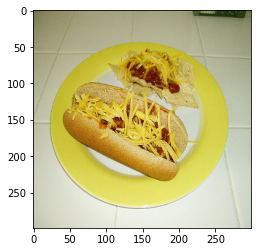

In [64]:
plt.imshow(X_train[0])

In [35]:
cnn_model=Sequential()
cnn_model.add(Conv2D(filters=6,kernel_size=(3,3),activation="relu",input_shape=(299,299,3)))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Conv2D(16,kernel_size=(3,3),activation="relu"))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(128,activation="relu"))
cnn_model.add(Dense(128,activation="relu"))
cnn_model.add(Dense(2,activation="sigmoid"))
cnn_model.compile(loss=losses.CategoricalCrossentropy(),optimizer='adam',metrics=['accuracy'])
history_cnn=cnn_model.fit(X_train,y_train,batch_size=256,validation_data=(X_test,y_test),epochs=10,verbose=1)

Epoch 1/10


2022-10-21 13:12:57.979608: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


12/12 [==============================] - ETA: 0s - loss: 2.3705 - accuracy: 0.4993

2022-10-21 13:13:14.950552: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


12/12 [==============================] - 19s 1s/step - loss: 2.3705 - accuracy: 0.4993 - val_loss: 0.7577 - val_accuracy: 0.5000
Epoch 2/10
12/12 [==============================] - 17s 1s/step - loss: 0.7389 - accuracy: 0.4950 - val_loss: 0.6812 - val_accuracy: 0.5575
Epoch 3/10
12/12 [==============================] - 8s 635ms/step - loss: 0.6506 - accuracy: 0.6113 - val_loss: 0.6398 - val_accuracy: 0.6429
Epoch 4/10
12/12 [==============================] - 8s 649ms/step - loss: 0.6001 - accuracy: 0.6713 - val_loss: 0.6136 - val_accuracy: 0.6724
Epoch 5/10
12/12 [==============================] - 9s 773ms/step - loss: 0.5636 - accuracy: 0.7123 - val_loss: 0.6062 - val_accuracy: 0.6894
Epoch 6/10
12/12 [==============================] - 8s 659ms/step - loss: 0.5246 - accuracy: 0.7413 - val_loss: 0.5919 - val_accuracy: 0.7096
Epoch 7/10
12/12 [==============================] - 8s 659ms/step - loss: 0.4730 - accuracy: 0.7853 - val_loss: 0.5779 - val_accuracy: 0.7236
Epoch 8/10
12/12 [===

In [37]:
def plot_results(history_,loss):
    if (loss=="loss"):        
        train_loss = history_.history['loss']
        test_loss = history_.history['val_loss']
        label="Loss"
    elif (loss=="acc"):
        train_loss = history_.history['accuracy']
        test_loss = history_.history['val_accuracy']
        label="Accuracy"
    
    epoch_labels = history_.epoch

    # Set figure size.
    plt.figure(figsize=(12, 8))

    # Generate line plot of training, testing loss over epochs.
    plt.plot(train_loss, label=f'Training {label}', color='#185fad')
    plt.plot(test_loss, label=f'Testing {label}', color='orange')

    # Set title
    plt.title(f'Training and Testing {label} by Epoch', fontsize=25)
    plt.xlabel('Epoch', fontsize=18)
    plt.ylabel('Categorical Crossentropy', fontsize=18)
    plt.xticks(epoch_labels, epoch_labels)    # ticks, labels

    plt.legend(fontsize=18);

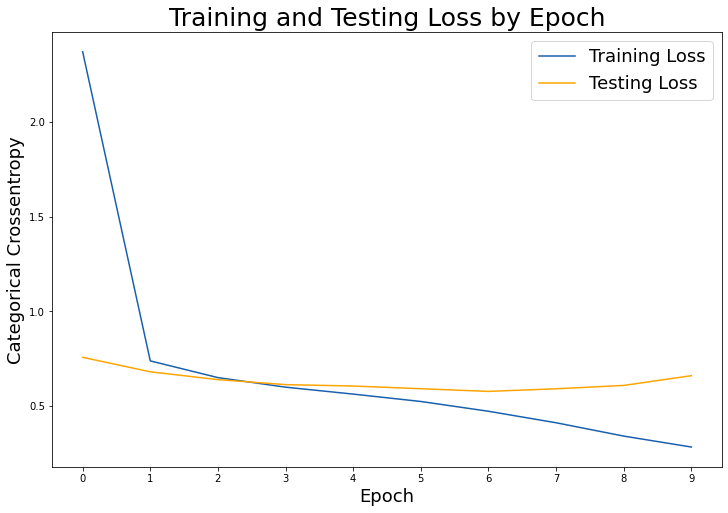

In [38]:
plot_results(history_cnn,"loss")

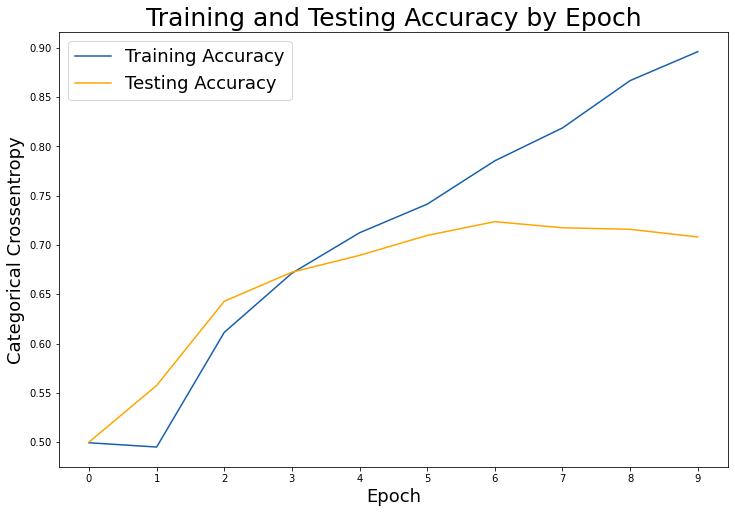

In [39]:
plot_results(history_cnn,"acc")

In [41]:
pickle.dump(cnn_model, open('model.p', 'wb'))

INFO:tensorflow:Assets written to: ram://75bd9659-7c2b-4433-bde0-740b89059456/assets


INFO:tensorflow:Assets written to: ram://75bd9659-7c2b-4433-bde0-740b89059456/assets


In [42]:
model_that_was_pickled = pickle.load(open('model.p', 'rb'))


In [44]:
model_that_was_pickled

2022-10-21 13:24:34.483867: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


21/21 [==============================] - 1s 43ms/step


array([[0.42008045, 0.75178367],
       [0.7091602 , 0.7606777 ],
       [0.41504773, 0.905826  ],
       ...,
       [0.5045696 , 0.90600014],
       [0.9970872 , 0.5095536 ],
       [0.67824495, 0.7573914 ]], dtype=float32)